In [1]:
from fastai.vision.all import *

In [2]:
path = '/storage/data/vinted/'

In [3]:
files = get_image_files(path)
len(files)

600

In [4]:
def get_folder_name(x):
    return [x.parent.name]

In [5]:
clothes = DataBlock(
    blocks=(ImageBlock, MultiCategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(),
    get_y=get_folder_name,
    item_tfms=Resize(460),
    batch_tfms=aug_transforms(size=224))

In [6]:
dls = clothes.dataloaders(path)

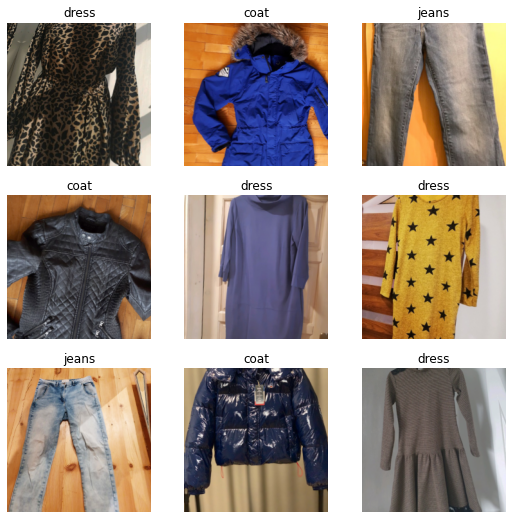

In [7]:
dls.show_batch()

In [8]:
learn = cnn_learner(dls, resnet50, loss_func=BCEWithLogitsLossFlat(thresh=0.7),
                    metrics=partial(accuracy_multi, thresh=0.7),
                    model_dir='/storage/models')

In [9]:
learn.dls.vocab

(#3) ['coat','dress','jeans']

SuggestedLRs(lr_min=0.010000000149011612, lr_steep=0.0020892962347716093)

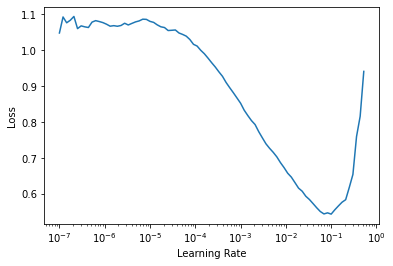

In [10]:
learn.lr_find()

In [11]:
learn.fine_tune(10, 2e-3)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.794375,0.431908,0.877778,00:06


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.426484,0.345951,0.897222,00:07
1,0.333312,0.302666,0.905556,00:06
2,0.274237,0.292250,0.911111,00:06
3,0.216206,0.307728,0.908333,00:07
4,0.178366,0.273622,0.905556,00:06
5,0.147803,0.228909,0.933333,00:06
6,0.124286,0.211526,0.936111,00:07
7,0.104243,0.201436,0.941667,00:06
8,0.091780,0.197454,0.941667,00:07
9,0.077944,0.191902,0.941667,00:06


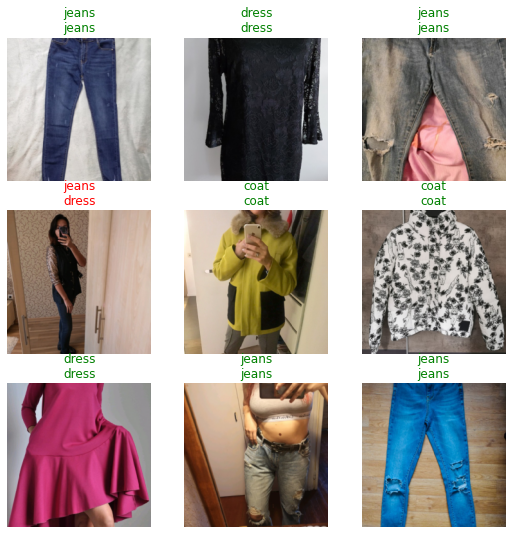

In [12]:
learn.show_results()

,target,predicted,probabilities,loss
0,coat,jeans,"tensor([0.0522, 0.0011, 1.0000])",4.646914958953857
1,jeans,dress,"tensor([0.1752, 0.9690, 0.0037])",3.0883450508117676
2,dress,jeans,"tensor([0.0833, 0.0689, 0.9811])",2.2443809509277344
3,dress,coat;dress,"tensor([0.9913, 0.9440, 0.0038])",1.6010098457336426
4,coat,dress,"tensor([0.1449, 0.9405, 0.0031])",1.5855510234832764
5,jeans,coat;jeans,"tensor([9.7575e-01, 1.4769e-05, 9.9786e-01])",1.2405014038085938
6,dress,coat,"tensor([0.8781, 0.4456, 0.0049])",0.9726909399032593
7,dress,coat;dress,"tensor([0.9020, 0.8551, 0.0030])",0.8273875713348389
8,dress,,"tensor([0.3017, 0.3307, 0.6255])",0.8159059286117554


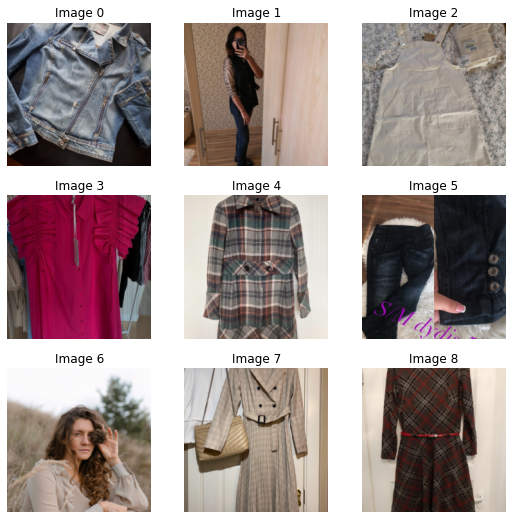

In [13]:
interp = Interpretation.from_learner(learn)
interp.plot_top_losses(9)

((#1) ['jeans'], tensor([False, False,  True]), tensor([0.1004, 0.0263, 0.9984]))


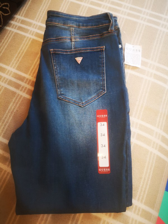

In [14]:
img_path = '/storage/data/images/1.jpeg'
print(learn.predict(img_path))
img = PILImage.create(img_path)
img.to_thumb(224)